# ![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

# Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

# Some business Objectives:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.
- Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

## Data Analysis Process
#### Remember the process:

- **Case Study**
- **Get data**
- **Cleaning/Wrangling/EDA**
- Processing Data
- Modeling
 -Validation
- Reporting


# Instructions

1. Import the necessary libraries.

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

3. First look at its main features (head, shape, info). **NOTE**   The target column is _total_claim_amount_

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

5. Change effective to date column to datetime format.

6. Create a NEW dataframe using only the numerical data called _numerical_df_.  **Use this for the following questions**.

6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

7. Plot a correlation matrix, comment what you see.

8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

9. Comment what you can see in the plots.

10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

11. Did you find outliers? Comment what you will do with them.  If you decide to remove them, do that now. Also, remove them from your **main** dataframe.

12. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

13. Save the numerical_df to csv as numerical.csv   You will use this file again this week.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#1 Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
#2 First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
#4
customer_df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [7]:
# Display the first few rows of the DataFrame
print(customer_df.head())

# Get the shape of the DataFrame (rows, columns)
print("Shape of the DataFrame:", customer_df.shape)

# Get information about the DataFrame including data types and non-null values
print(customer_df.info())


  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1

In [8]:
# 4 Rename the columns to snake case
customer_df = customer_df.rename(columns=lambda x: x.lower().replace(' ', '_'))

# Display the updated column names
print(customer_df.columns)


Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


In [9]:

# 5 Assuming customer_df is your DataFrame
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

# Check the data type of the column to confirm it's in datetime format
print(customer_df['effective_to_date'].dtype)


datetime64[ns]


In [10]:
#6 Select numerical data
numerical_df = customer_df.select_dtypes(include=['number'])

# Display the first few rows of the numerical DataFrame
print(numerical_df.head())


   customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                          0                   1          384.811147  
1                          0                   8         1131.464935  
2                          0                   2          5

In [22]:
# 7 
def categorize_variables(data_frame, threshold=50):
    continuous_vars = []
    discrete_vars = []

    for column in data_frame.columns:
        unique_count = data_frame[column].nunique()
        if unique_count > threshold:
            continuous_vars.append(column)
        else:
            discrete_vars.append(column)

    return continuous_vars, discrete_vars

continuous_df, discrete_df = categorize_variables(numerical_df)
continuous_df, discrete_df 

print("Continuous Variables:")
print(continuous_df)

print("\nDiscrete Variables:")
print(discrete_df)



Continuous Variables:
['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception', 'total_claim_amount']

Discrete Variables:
['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']


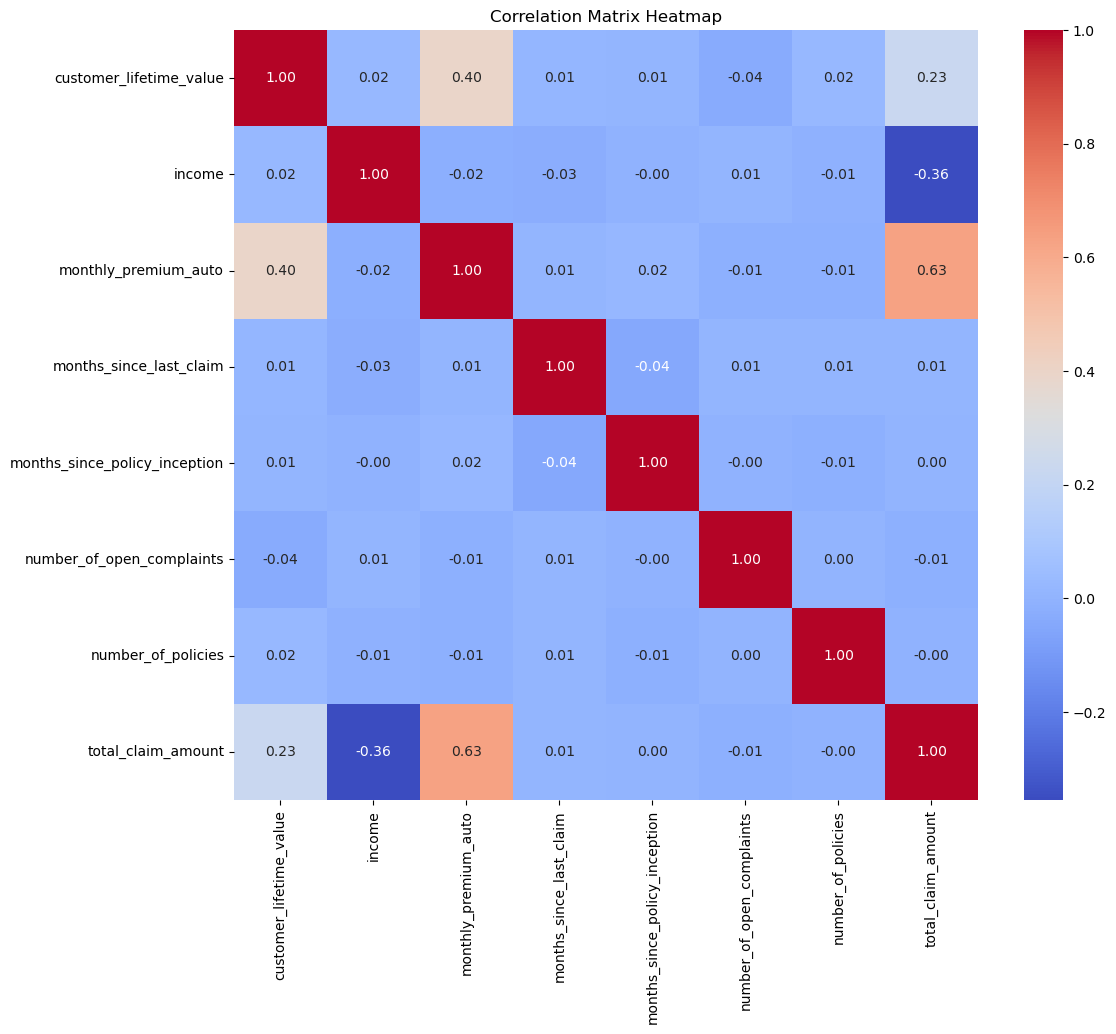

In [24]:
#8 
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [26]:
#9

import seaborn as sns
import matplotlib.pyplot as plt

def plot_variable_distributions(dataframe):
    for var in dataframe.columns:
        if dataframe[var].dtype == 'object':
            # Plot categorical (discrete) variables
            plt.figure(figsize=(8, 4))
            sns.countplot(data=dataframe, x=var, order=dataframe[var].value_counts().index)
            plt.title(f'Distribution of {var}')
            plt.xticks(rotation=45)
            plt.show()
        else:
            # Plot numerical (continuous) variables
            plt.figure(figsize=(8, 4))
            sns.histplot(data=dataframe, x=var, kde=True)
            plt.title(f'Distribution of {var}')
            plt.show()


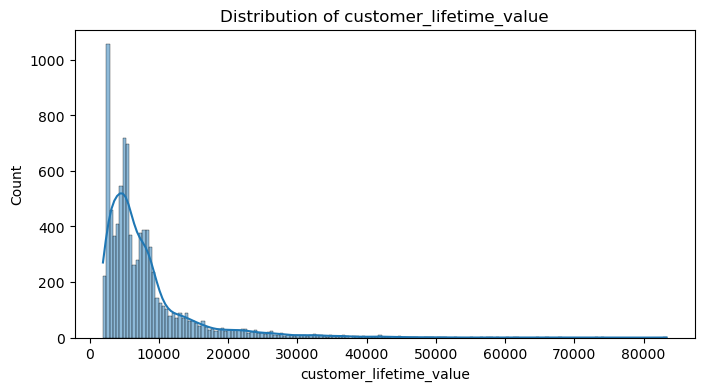

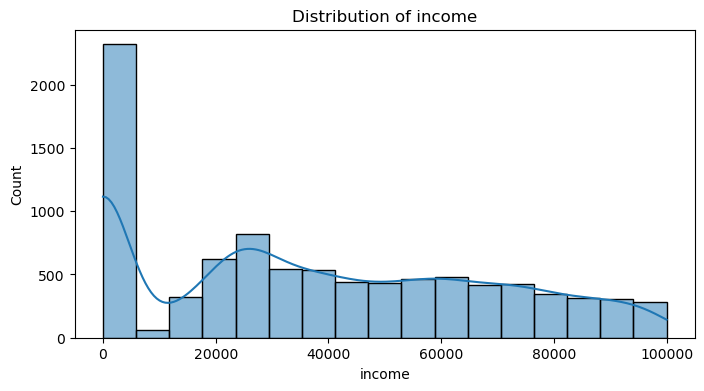

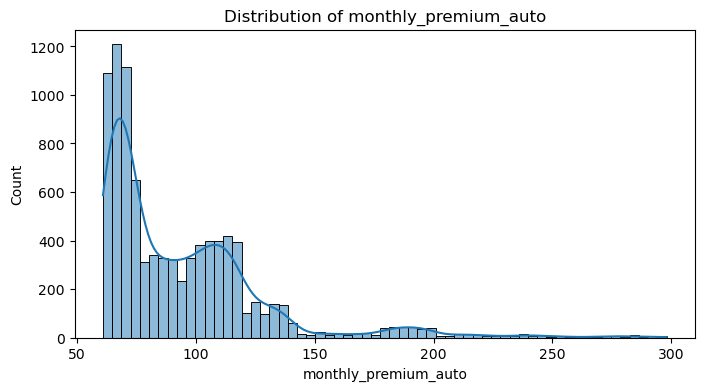

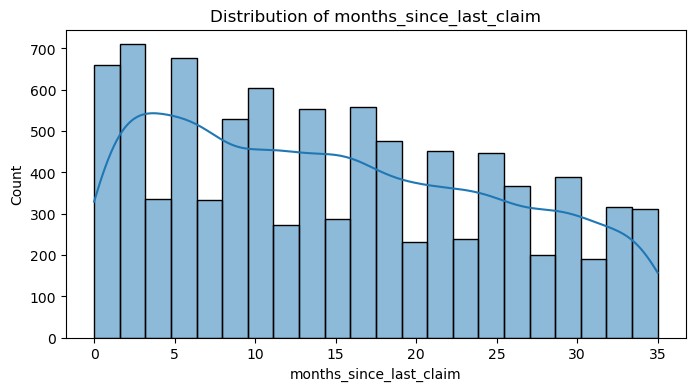

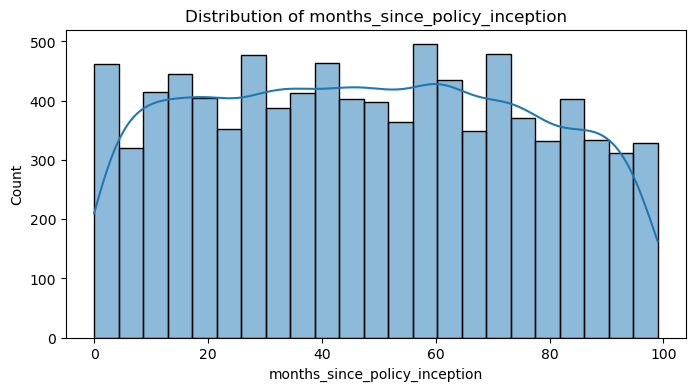

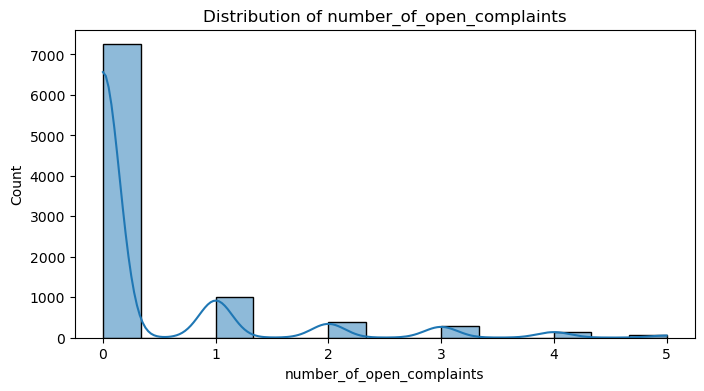

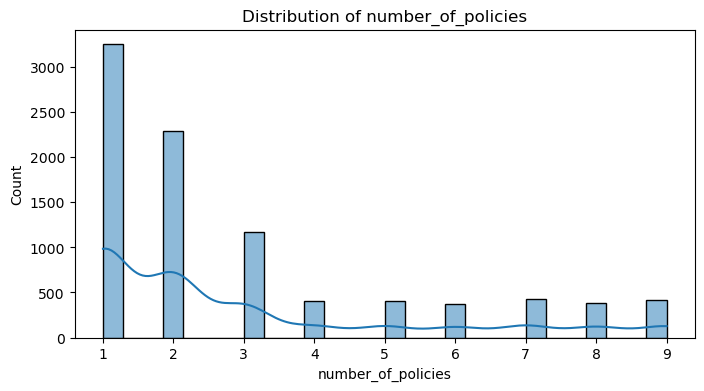

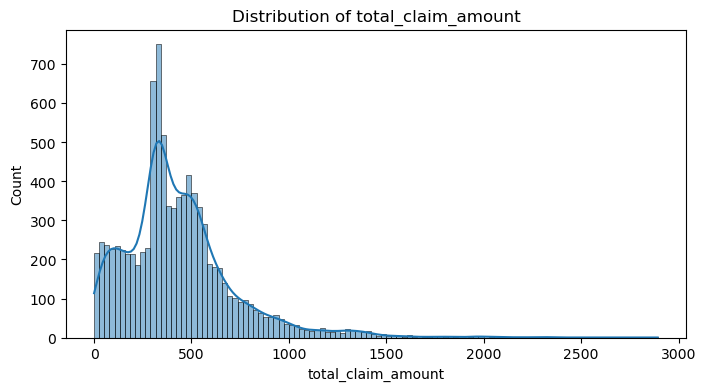

In [28]:
# Plot variable distributions
plot_variable_distributions(numerical_df)


In [ ]:
#10

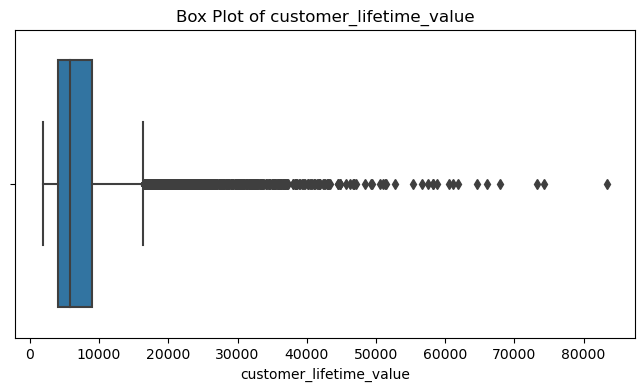

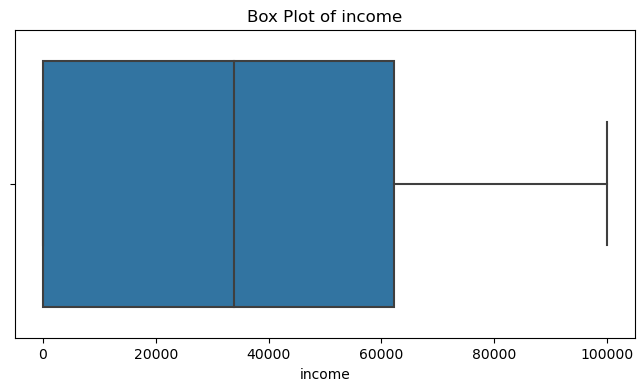

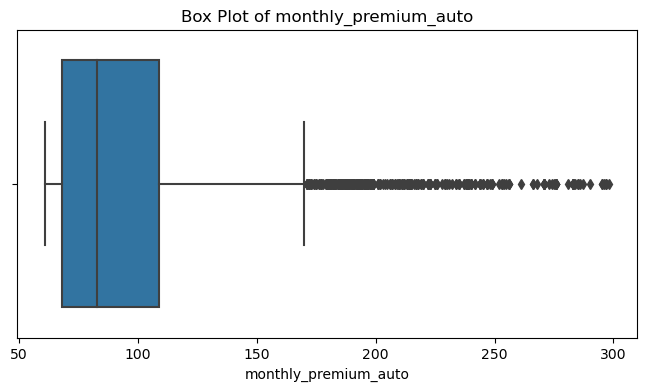

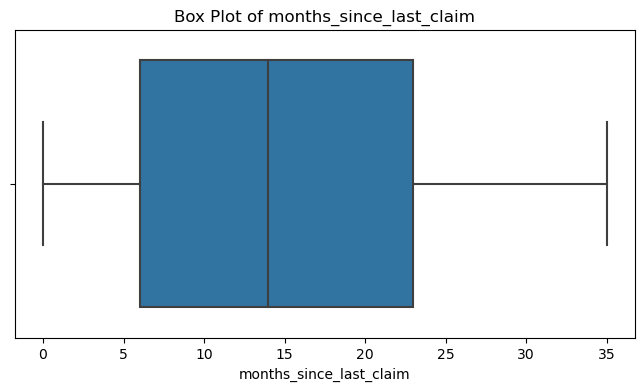

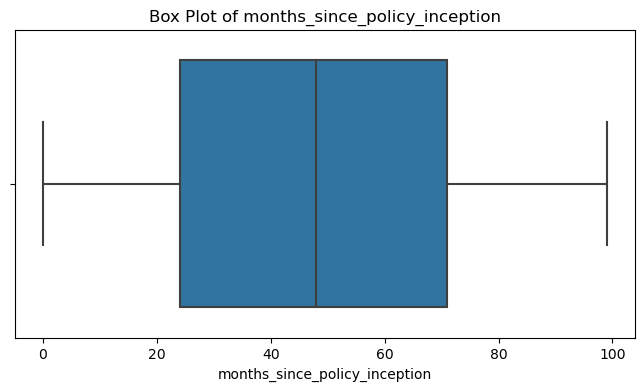

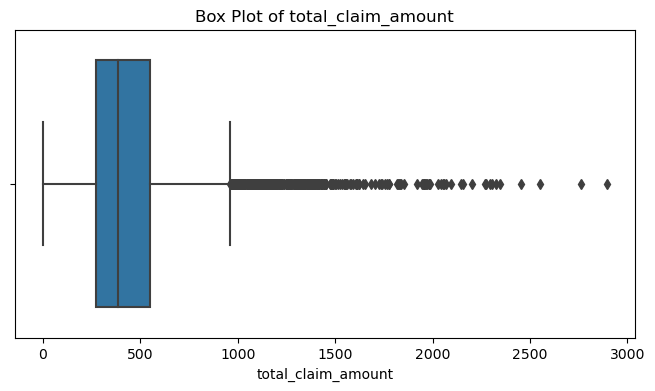

In [36]:
# 11 Define the function to plot continuous variables
def plot_continuous_variables(data, continuous_vars):
    for column in continuous_vars:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[column])
        plt.title(f'Box Plot of {column}')
        plt.show()

# Create a list of continuous variables
continuous_vars = [col for col in numerical_df.columns if len(numerical_df[col].unique()) > 10]
continuous_vars

# Plot the box plots for continuous variables
plot_continuous_variables(numerical_df, continuous_vars)


In [39]:

# 12 Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Define continuous variables
continuous_vars = ['customer_lifetime_value', 'income', 'total_claim_amount', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']

# Remove outliers for each continuous variable
for var in continuous_vars:
    numerical_df = remove_outliers_iqr(numerical_df, var)

# Confirm the shape after removing outliers
print("Shape after removing outliers:", numerical_df.shape)

# Now you have a cleaned numerical_df without the identified outliers


Shape after removing outliers: (5701, 8)


In [40]:
#13  

# Check for NaN values in each column
nan_counts = customer_df.isna().sum()
nan_percentage = (nan_counts / len(customer_df)) * 100

# Create a DataFrame to display NaN information
nan_info = pd.DataFrame({'Total NaN': nan_counts, 'Percentage of NaN': nan_percentage})
nan_info = nan_info.sort_values(by='Percentage of NaN', ascending=False)

# Display columns with NaN values and their respective percentages
print("Columns with NaN values:")
print(nan_info[nan_info['Total NaN'] > 0])

# Handle NaN values based on the analysis
# Example: You can choose to impute or drop columns with a significant number of NaN values.


Columns with NaN values:
Empty DataFrame
Columns: [Total NaN, Percentage of NaN]
Index: []


In [42]:
numerical_df.to_csv('numerical.csv', index=False)


![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Cleaning categorical data

For this lab, we will be using the same notebook as in the previous lab.

## Data Analysis Process
#### Remember the process:

- Case Study
- **Get data**
- **Cleaning/Wrangling/EDA**
- Processing Data
- Modeling
 -Validation
- Reporting

### Instructions

1. Open the notebook created for Lab-cleaning-numerical-data.

2. Find  all of the categorical data.  Save it in a categorical_df variable.

3. Check for NaN values and decide what to do with them, do it now.

4. Check all unique values of columns.

5. Check dtypes. Do they all make sense as categorical data?

6. Does any column contain alpha and numeric data?  Decide how to clean it and do it now.

7. Would you choose to do anything else to clean or wrangle the categorical data?  Comment your decisions and do it now.

8. Compare policy_type and policy.  What information is contained in these columns.  Can you identify what is important?  

9. Check number of unique values in each column, can they be combined in any way to ease encoding?  Comment your thoughts and make those changes.

10.  Save the cleaned catagorical dataframe as categorical.csv   You will use this file again this week.


In [45]:
#2
categoricals = customer_df.select_dtypes(object)
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [46]:
#3 
# Check for NaN values in categorical_df
nan_values = categorical_df.isnull().sum()
nan_values

# Display columns with NaN values and their respective counts
print(nan_values[nan_values > 0])

# Decide what to do with the NaN values
# Depending on the specific column and dataset, you can consider various approaches:
# 1. Drop rows with NaN values: categorical_df.dropna()
# 2. Fill NaN values with a specific value: categorical_df.fillna(value)
# 3. Impute missing values using a strategy like mode or a custom approach

# Example: Filling NaN values with a specific value (e.g., "Unknown")
categorical_df.fillna("Unknown", inplace=True)


Series([], dtype: int64)


C:\Users\User\AppData\Local\Temp\ipykernel_16404\2133291451.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df.fillna("Unknown", inplace=True)


In [47]:
#4 
# Iterate through columns and print unique values
for column in categorical_df.columns:
    unique_values = categorical_df[column].unique()
    print(f"Unique values in {column} column: {unique_values}")


Unique values in customer column: ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
Unique values in state column: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Unique values in response column: ['No' 'Yes']
Unique values in coverage column: ['Basic' 'Extended' 'Premium']
Unique values in education column: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Unique values in employmentstatus column: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Unique values in gender column: ['F' 'M']
Unique values in location_code column: ['Suburban' 'Rural' 'Urban']
Unique values in marital_status column: ['Married' 'Single' 'Divorced']
Unique values in policy_type column: ['Corporate Auto' 'Personal Auto' 'Special Auto']
Unique values in policy column: ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
Unique values in renew_offer_type column: ['Offer1' 'Offer3' 'Offer

In [48]:
# 5 Check data types of columns
column_dtypes = categorical_df.dtypes

# Print data types and unique values for each column
for column, dtype in column_dtypes.iteritems():
    unique_values = categorical_df[column].unique()
    print(f"Column: {column}, Data Type: {dtype}, Unique Values: {unique_values}")


Column: customer, Data Type: object, Unique Values: ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
Column: state, Data Type: object, Unique Values: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Column: response, Data Type: object, Unique Values: ['No' 'Yes']
Column: coverage, Data Type: object, Unique Values: ['Basic' 'Extended' 'Premium']
Column: education, Data Type: object, Unique Values: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Column: employmentstatus, Data Type: object, Unique Values: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Column: gender, Data Type: object, Unique Values: ['F' 'M']
Column: location_code, Data Type: object, Unique Values: ['Suburban' 'Rural' 'Urban']
Column: marital_status, Data Type: object, Unique Values: ['Married' 'Single' 'Divorced']
Column: policy_type, Data Type: object, Unique Values: ['Corporate Auto' 'Personal Auto' 'Special Auto']
Column: policy, Data Type: object, Unique Values

In [49]:
#6 


# Sample data for illustration (replace with your actual data)
data = {'Column1': ['A1', 'B2', 'C3', 'D4', 'E5'],
        'Column2': ['F6', 'G7', 'H8', 'I9', 'J10']}

# Create a DataFrame
df = pd.DataFrame(data)

# Loop through columns to check if they contain alphanumeric data
for column in df.columns:
    if df[column].str.contains(r'\d').any() and df[column].str.contains(r'[A-Za-z]').any():
        # If the column contains both text and numeric data
        # You can choose to clean it in a specific way
        # For example, remove non-numeric characters
        df[column] = df[column].str.replace(r'[^0-9]', '', regex=True)

# Print the cleaned DataFrame
print(df)



  Column1 Column2
0       1       6
1       2       7
2       3       8
3       4       9
4       5      10


In [59]:
customer_df['combined_policy'] = customer_df['policy_type'] + '_' + customer_df['policy']
customer_df['combined_policy']

0       Corporate Auto_Corporate L3
1         Personal Auto_Personal L3
2         Personal Auto_Personal L3
3       Corporate Auto_Corporate L2
4         Personal Auto_Personal L1
                   ...             
9129      Personal Auto_Personal L1
9130    Corporate Auto_Corporate L3
9131    Corporate Auto_Corporate L2
9132      Personal Auto_Personal L2
9133    Corporate Auto_Corporate L3
Name: combined_policy, Length: 9134, dtype: object

In [68]:
# Drop the original columns if necessary
# Replace 'actual_policy_type_column' and 'actual_policy_column' with the actual column names
customer_df = customer_df.drop(['policy_type', 'policy'], axis=1)
customer_df


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,combined_policy
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,32,5,0,1,Offer1,Agent,384.811147,Two-Door Car,Medsize,Corporate Auto_Corporate L3
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,13,42,0,8,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Personal Auto_Personal L3
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,18,38,0,2,Offer1,Agent,566.472247,Two-Door Car,Medsize,Personal Auto_Personal L3
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,18,65,0,7,Offer1,Call Center,529.881344,SUV,Medsize,Corporate Auto_Corporate L2
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,12,44,0,1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Personal Auto_Personal L1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,18,89,0,2,Offer2,Web,198.234764,Four-Door Car,Medsize,Personal Auto_Personal L1
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,14,28,0,1,Offer1,Branch,379.200000,Four-Door Car,Medsize,Corporate Auto_Corporate L3
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,9,37,3,2,Offer1,Branch,790.784983,Four-Door Car,Medsize,Corporate Auto_Corporate L2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,34,3,0,3,Offer3,Branch,691.200000,Four-Door Car,Large,Personal Auto_Personal L2


In [69]:
#9 

categorical_df.to_csv('categorical.csv', index=False)
